In [1]:
from astropy.io import fits
import numpy as np
import astropy
from astropy.table import Table
import matplotlib.pyplot as plt

In [3]:
file = '/home/suman/tifr/20230724_1516_1000pkts_Am241_20kev_org_code.fits'
file1 = path + '202307011_1531_Eu_on_det1_30000pkts.fits'
hdul = fits.open(file)[1]

In [4]:
data = hdul.data
tab = Table(data)
tab

time,detid,pixid,pha
uint32,int16,int16,int16
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
...,...,...,...
3700531025,1,185,458
3700548862,1,170,991


In [5]:
data['pixid']

array([  0,   0,   0, ..., 216, 214, 185], dtype=int16)

In [6]:
#mask = 0 < np.any(data['pixid']) < 3

In [7]:
#plt.plot(data["pixid"][mask],data["pha"][mask])

In [8]:
detid = data[data['detid']== 1]
data_ = detid[detid['pixid'] == 5]

np.shape(data_)
data_


FITS_rec([(2809842599, 1, 5, 2218), (2860364184, 1, 5,  427),
          (2947556118, 1, 5, 1091), (2955423017, 1, 5,  900),
          (2972472846, 1, 5, 2464), (3091380079, 1, 5, 1112),
          (3382254376, 1, 5, 4095), (3660707244, 1, 5,  875)],
         dtype=(numpy.record, [('time', '>i4'), ('detid', '>i2'), ('pixid', '>i2'), ('pha', '>i2')]))

In [9]:
tab = Table(data)
#tab

In [10]:
tab_ = Table(data_)
tab_

time,detid,pixid,pha
uint32,int16,int16,int16
2809842599,1,5,2218
2860364184,1,5,427
2947556118,1,5,1091
2955423017,1,5,900
2972472846,1,5,2464
3091380079,1,5,1112
3382254376,1,5,4095
3660707244,1,5,875


In [11]:
len(np.unique(data_['time']))

8

In [12]:
import matplotlib.pyplot as plt

In [13]:
len(data_['pha'])

8

In [14]:
np.sqrt(len(data_['PHA']))

2.8284271247461903

Text(0, 0.5, 'PHA')

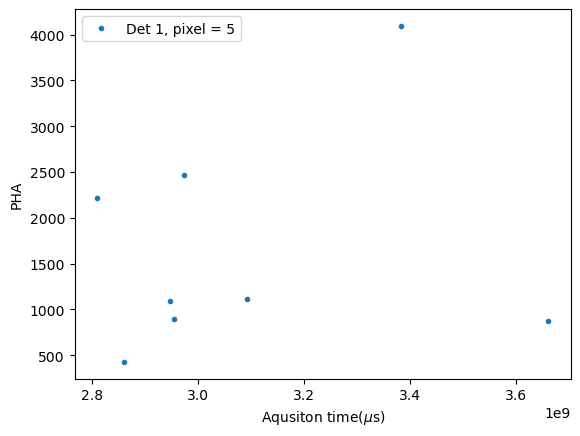

In [15]:
plt.plot((data_['time']),(data_['pha']),".", label = 'Det 1, pixel = 5')
plt.xlabel("Aqusiton time($\mu$s)")
plt.legend()
plt.ylabel("PHA")
#plt.xscale("log")
#plt.yscale("log")
#plt.xlim(0, 100000000)

In [16]:
 N,bins= np.histogram(data_['pha'], bins=300)
# plt.xlabel("PHA")
# plt.ylabel("Counts")
# plt.legend()
# plt.show()
# len(bins)

In [17]:
len(N)

300

In [18]:
bin_centers = (bins[:-1] + bins[1:]) / 2

In [19]:
def gauss(x,amp,mean,stdev):
    return amp*np.exp(-(x-mean)**2/(2*stdev**2))

In [20]:
gauss(1,10,9.3,0.3)

6.107321563648419e-166

In [21]:
p0 = [np.max(N),np.mean(data_['pha']),np.std(data_['pha'])]

In [22]:
p0

[1, 1647.75, 1130.4857086668544]

In [23]:
from scipy.optimize import curve_fit

In [24]:
params, pcov = curve_fit(gauss,bin_centers,N,p0)
errors = np.sqrt(np.diag(pcov))
params

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [25]:
fit_curve = gauss(bin_centers,*params)

NameError: name 'params' is not defined

In [26]:
plt.plot(bin_centers, fit_curve, 'r-', label='Gaussian Fit over full data')
N,bins,_ = plt.hist(data_['pha'], bins=len(bins)-1, label="Det 1,pixel =5")
plt.xlabel("PHA")
plt.ylabel("Counts")
plt.legend()
plt.show()
print("No. of bins, Mean, Deviation")
for p,e in zip(params, errors):
    print(f"{p:0.1f} +- {e:0.1f}")
print("Approximate resolution : {:0.1f}%".format(100* 2.35 * params[2] / params[1]))

NameError: name 'fit_curve' is not defined

with a certain range fitting


In [27]:
# min_val_PHA  = p0[1]-2*p0[2]
# max_val_PHA  = p0[1]+3*p0[2]
# min_val_PHA,max_val_PHA

In [28]:
min_val_PHA = 750
max_val_PHA = 1250

In [29]:
fit_range = np.where((min_val_PHA <=bins[:-1]) & (max_val_PHA >= bins[1:]))[0]
#fit_range

In [30]:
fit_range_final = N[fit_range]
#fit_range_final

In [31]:
fit_bin_center = (bins[:-1] + bins[1:]) / 2
#fit_bin_center

In [32]:
bin_center_fit_range = fit_bin_center[fit_range]
#bin_center_fit_range

In [33]:
params1, pcov1 = curve_fit(gauss,bin_center_fit_range,fit_range_final,p0)
errors1 = np.sqrt(np.diag(pcov))
params1

NameError: name 'pcov' is not defined

In [34]:
fit_curve1 = gauss(bin_center_fit_range, *params1)

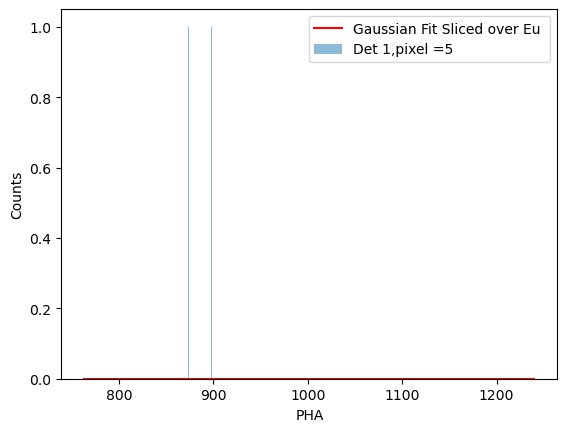

No. of bins, Mean, Deviation


NameError: name 'errors1' is not defined

In [35]:
plt.bar(bin_center_fit_range,fit_range_final, alpha=0.5, label='Det 1,pixel =5  ')
plt.plot(bin_center_fit_range, fit_curve1, 'r-', label='Gaussian Fit Sliced over Eu ')
plt.xlabel("PHA")
plt.ylabel("Counts")
plt.legend()
plt.show()
print("No. of bins, Mean, Deviation")
for p,e in zip(params1, errors1):
    print(f"{p:0.1f} +- {e:0.1f}")
print("Approximate resolution : {:0.1f}%".format(100* 2.35 * params1[2] / params1[1]))

In [36]:
params1, errors1

NameError: name 'errors1' is not defined